In [440]:
import numpy as np 
import pandas as pd 
import os

import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader, random_split, TensorDataset
import torchvision.models as models
import PIL
import glob

from tqdm import tqdm

import matplotlib.pyplot as plt

from utils import *
from CNN import *

In [441]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
torch.set_default_device(device)
print(f"default device set to {device}")


default device set to cpu


In [442]:
data = []

pieces_folders = glob.glob("/data/*")
bishop_images = glob.glob("data/bishop/*")
king_images = glob.glob("data/king/*")
knight_images = glob.glob("data/knight/*")
pawn_images = glob.glob("data/pawn/*")
queen_images = glob.glob("data/queen/*")
rook_images = glob.glob("data/rook/*")
empty_images = glob.glob("data/empty/*")

In [443]:
image_paths = {
    "bishop": bishop_images,
    "king": king_images,
    "knight": knight_images,
    "pawn": pawn_images,
    "queen": queen_images,
    "rook": rook_images,
    "empty": empty_images,

}

n_classes = len(image_paths)
classes = {
    "bishop": 0,
    "empty": 1,
    "king": 2,
    "knight": 3,
    "pawn": 4,
    "queen": 5,
    "rook": 6, 
}

id_to_class = {v: c for c, v in classes.items()}

print(id_to_class)

{0: 'bishop', 1: 'empty', 2: 'king', 3: 'knight', 4: 'pawn', 5: 'queen', 6: 'rook'}


torch.Size([3, 85, 85])


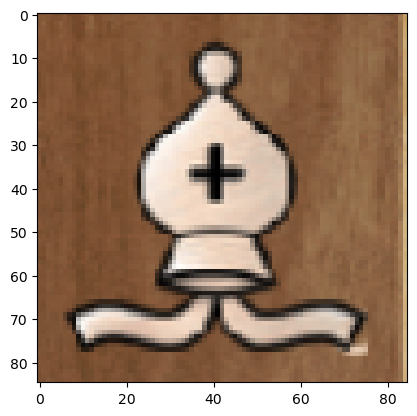

In [444]:
converter = torchvision.transforms.ToTensor()
image_tensor = image_to_tensor(r"data\bishop\100.png", converter=converter)
print(image_tensor.shape)
plot_image(image_tensor)

In [445]:
images = []
labels = []
converter = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((85,85))
    ])
for label, image_path_array in image_paths.items():
    for image_path in image_path_array:
        #print(image_path, label)
        image_tensor = image_to_tensor(image_path=image_path, converter=converter)
        images.append(image_tensor)
        labels.append(classes[label])
    # image_tensor = image_to_tensor(image_path=image_path, converter=converter)
    #print(image_tensor.shape)
    
images_tensor = torch.stack(images)
labels_tensor = torch.tensor(labels)
images_tensor = torch.stack(images).to(device)  # Ensure images are on GPU
labels_tensor = torch.tensor(labels).to(device)
print(images_tensor.shape)
print(labels_tensor.shape)

torch.Size([550, 3, 85, 85])
torch.Size([550])


In [446]:

dataset = TensorDataset(images_tensor, labels_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

pawn


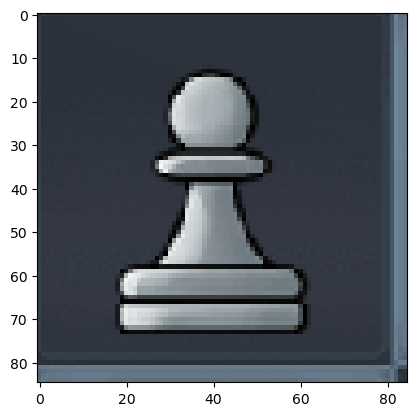

In [447]:
batch_sample_images, batch_sample_labels = next(iter(train_dataloader))
sample, sample_label = batch_sample_images[0], batch_sample_labels[0]
plot_image(sample)
print(id_to_class[sample_label.item()])

In [448]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
net = Net(n_classes=n_classes).to(device)
optimizer = torch.optim.Adam(params=net.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

Using device: cuda


model predicted --> knight


KeyError: 6

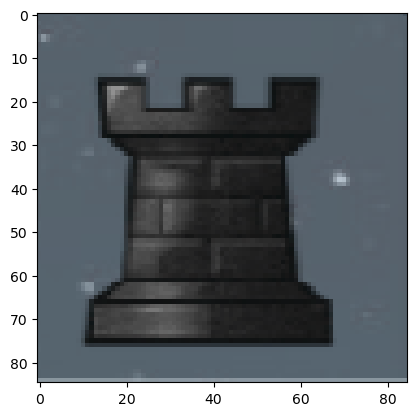

In [449]:
model_pred(model=net, dataset=train_dataset, device=device)

In [ ]:
train_model(model=net, train_dataloader=train_dataloader, val_dataloader=val_dataloader, loss_fn=loss_fn, optimizer=optimizer, epochs=10, device=device)

Epoch [1/10], Training Accuracy: 90.91%, Loss: 0.2916
Epoch [2/10], Training Accuracy: 96.36%, Loss: 0.2114
Epoch [3/10], Training Accuracy: 95.45%, Loss: 0.0016
Epoch [4/10], Training Accuracy: 98.18%, Loss: 0.0000
Epoch [5/10], Training Accuracy: 95.45%, Loss: 0.0113
Epoch [6/10], Training Accuracy: 97.27%, Loss: 0.2783
Epoch [7/10], Training Accuracy: 97.27%, Loss: 0.0032
Epoch [8/10], Training Accuracy: 97.27%, Loss: 0.0474
Epoch [9/10], Training Accuracy: 98.18%, Loss: 0.0003
Epoch [10/10], Training Accuracy: 98.18%, Loss: 0.0001


model predicted --> rook
label is 5 (rook)


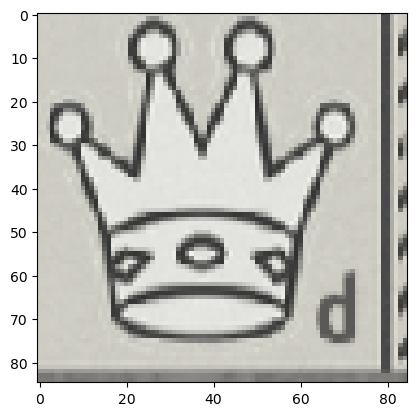

In [438]:
model_pred(model=net, dataset=dataset, device=device)

In [439]:
accuracy = calculate_accuracy(net, val_dataloader, device)
print(f"Validation Accuracy: {accuracy:.2f}%")
torch.save(net.state_dict(), "chess_piece_classifier.pth")

Validation Accuracy: 98.18%
